### Step 1: Data collection

**`Dependent variable`**: H1b case number by state in 2016   
**`Independent variable 1`**: GDP by state in 2016  
**`Independent variable 2`**: Firm number by state in 2016 

In [1]:
# Import packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [47]:
# Import the dataset including the dependent variable

h1b = pd.read_excel("https://www.foreignlaborcert.dole\
                    ta.gov/pdf/PerformanceData/2017/H-1B_Disclosure_Data_FY17.xlsx")

In [54]:
isSub2016 = (h1b['CASE_SUBMITTED'] > "2015-12-31") & (h1b['CASE_SUBMITTED'] < "2017-1-1")
print(isSub2016.head())

0     True
1     True
2     True
3     True
4    False
Name: CASE_SUBMITTED, dtype: bool


In [55]:
h1b = h1b[isSub2016]
h1b.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_BUSINESS_DBA,EMPLOYER_ADDRESS,...,H1B_DEPENDENT,WILLFUL_VIOLATOR,SUPPORT_H1B,LABOR_CON_AGREE,PUBLIC_DISCLOSURE_LOCATION,WORKSITE_CITY,WORKSITE_COUNTY,WORKSITE_STATE,WORKSITE_POSTAL_CODE,ORIGINAL_CERT_DATE
0,I-200-16055-173457,CERTIFIED-WITHDRAWN,2016-02-24,2016-10-01,H-1B,2016-08-10,2019-08-10,DISCOVER PRODUCTS INC.,NaN,2500 LAKE COOK ROAD,...,N,N,NaN,Y,NaN,RIVERWOODS,LAKE,IL,60015,2016-03-01
1,I-200-16064-557834,CERTIFIED-WITHDRAWN,2016-03-04,2016-10-01,H-1B,2016-08-16,2019-08-16,DFS SERVICES LLC,NaN,2500 LAKE COOK ROAD,...,N,N,NaN,Y,NaN,RIVERWOODS,LAKE,IL,60015,2016-03-08
2,I-200-16063-996093,CERTIFIED-WITHDRAWN,2016-03-10,2016-10-01,H-1B,2016-09-09,2019-09-09,EASTBANC TECHNOLOGIES LLC,NaN,1211 31ST ST. NW,...,Y,N,Y,NaN,NaN,WASHINGTON,NaN,DC,20007,2016-03-16
3,I-200-16272-196340,WITHDRAWN,2016-09-28,2016-10-01,H-1B,2017-01-26,2020-01-25,INFO SERVICES LLC,NaN,17177 NORTH LAUREL PARK DR,...,Y,N,Y,NaN,NaN,JERSEY CITY,HUDSON,NJ,07302,NaT
6,I-200-16056-842817,CERTIFIED-WITHDRAWN,2016-02-25,2016-10-02,H-1B,2016-08-25,2019-08-24,CITADEL INFORMATION SERVICES INC.,CITADEL,33 WOOD AVENUE SOUTH,...,Y,N,Y,Y,NaN,EDISON,MIDDLESEX,NJ,08837,2016-03-02


In [150]:
h1b_gb = h1b['CASE_NUMBER'].groupby(h1b['WORKSITE_STATE']).count()
h1b_gb = pd.DataFrame(h1b_gb)
h1b_gb = h1b_gb.reset_index()
h1b_gb

,WORKSITE_STATE,CASE_NUMBER
0,AK,24
1,AL,267
2,AR,480
3,AZ,1803
4,CA,19664
5,CO,1013
6,CT,1463
7,DC,684
8,DE,636
9,FL,3263


In [151]:
states = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

h1b_gb['STATE'] = h1b_gb['WORKSITE_STATE'].map(states)
h1b_gb.head()

,WORKSITE_STATE,CASE_NUMBER,STATE
0,AK,24,Alaska
1,AL,267,Alabama
2,AR,480,Arkansas
3,AZ,1803,Arizona
4,CA,19664,California


In [65]:
gdp = pd.read_csv("C:/Users/Jie Lian/CompEcon_Fall19/ProblemSet/ProblemSet5/SAGDP2N__ALL_AREAS_1997_2018.csv")

In [67]:
gdp.head(10)

,GeoFIPS,GeoName,Region,TableName,ComponentName,Unit,IndustryId,IndustryClassification,Description,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"""00000""",United States *,,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,8577552.0,...,14448932.0,14992052.0,15542582.0,16197007.0,16784851.0,17521747.0,18219297.0,18707189.0,19485394.0,20494079.0
1,"""00000""",United States *,,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,2.0,...,Private industries,7431991.6,...,12403879.9,12884088.6,13405520.0,14037519.0,14572341.0,15250030.3,15878808.0,16319357.0,17031690.0,17989359.0
2,"""00000""",United States *,,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,3.0,11,"Agriculture, forestry, fishing and hunting",108636.5,...,129967.8,146299.0,180944.9,179573.0,215600.6,200841.6,181220.0,164913.0,169225.0,164188.0
3,"""00000""",United States *,,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,4.0,111-112,Farms,88136.0,...,103102.0,117629.0,152249.0,148939.0,184621.0,167940.0,146376.0,129458.0,132818.0,(NA)
4,"""00000""",United States *,,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,5.0,113-115,"Forestry, fishing, and related activities",20500.5,...,26865.8,28670.0,28695.8,30634.0,30979.6,32901.6,34844.0,35455.0,36407.0,(NA)
5,"""00000""",United States *,,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,6.0,21,"Mining, quarrying, and oil and gas extraction",95061.5,...,275840.9,305838.1,356315.5,358798.0,386518.6,413005.2,257852.0,216218.0,268619.0,321119.0
6,"""00000""",United States *,,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,7.0,211,Oil and gas extraction,55060.3,...,172888.7,188822.7,218093.7,223767.0,255103.8,275220.2,151805.0,133649.0,174755.0,(NA)
7,"""00000""",United States *,,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,8.0,212,Mining (except oil and gas),26501.3,...,61569.8,69496.9,76367.2,66648.0,62140.5,58570.0,51506.0,49753.0,54228.0,(NA)
8,"""00000""",United States *,,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,9.0,213,Support activities for mining,13499.9,...,41382.4,47518.5,61854.5,68383.0,69274.3,79214.9,54541.0,32816.0,39636.0,(NA)
9,"""00000""",United States *,,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,10.0,22,Utilities,171479.1,...,258241.0,278837.0,287459.1,279651.0,286340.2,298154.1,299036.0,302715.0,307496.0,319427.0


In [72]:
isAllInd = gdp['Description'] == 'All industry total'
gdp = gdp[isAllInd]
gdp.head(10)

,GeoFIPS,GeoName,Region,TableName,ComponentName,Unit,IndustryId,IndustryClassification,Description,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"""00000""",United States *,,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,8577552.0,...,14448932.0,14992052.0,15542582.0,16197007.0,16784851.0,17521747.0,18219297.0,18707189.0,19485394.0,20494079.0
95,"""01000""",Alabama,5,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,104087.4,...,168348.0,174753.0,181349.8,186299.0,191481.0,194059.7,200460.8,203398.4,211665.9,221126.3
186,"""02000""",Alaska,8,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,25744.8,...,49585.9,52882.5,56259.9,57670.1,56622.8,55547.4,50615.0,49429.4,51686.7,54011.2
277,"""04000""",Arizona,6,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,132418.0,...,243929.4,248210.0,257947.8,268288.8,275199.1,284573.8,297095.9,311396.6,326539.2,346791.9
368,"""05000""",Arkansas,5,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,59865.6,...,97058.9,101690.0,106085.4,108745.2,114251.5,117339.1,118525.9,120090.2,123713.7,128081.7
459,"""06000""",California,8,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,1070523.6,...,1920061.8,1974614.5,2050056.8,2144497.3,2262771.2,2396552.1,2558171.2,2663395.6,2809922.4,2968117.6
550,"""08000""",Colorado,7,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,136675.3,...,248593.6,255140.5,264431.6,273519.5,288305.2,306362.0,318230.4,329097.3,347195.7,368795.1
641,"""09000""",Connecticut,1,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,138648.8,...,236393.2,237653.4,236523.7,243801.0,246632.0,248954.2,259697.9,262978.6,265535.4,274179.5
732,"""10000""",Delaware,2,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,32967.7,...,56871.2,57447.4,60357.4,61975.8,60666.1,67178.9,70896.2,70379.8,72167.2,74973.3
823,"""11000""",District of Columbia,2,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,52451.9,...,100894.6,106120.3,110076.2,112736.5,114891.0,119994.4,125176.5,129816.6,134901.4,140279.9


In [76]:
gdp = gdp.reset_index(drop=True)
gdp.head(10)

,GeoFIPS,GeoName,Region,TableName,ComponentName,Unit,IndustryId,IndustryClassification,Description,1997,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,"""00000""",United States *,,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,8577552.0,...,14448932.0,14992052.0,15542582.0,16197007.0,16784851.0,17521747.0,18219297.0,18707189.0,19485394.0,20494079.0
1,"""01000""",Alabama,5,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,104087.4,...,168348.0,174753.0,181349.8,186299.0,191481.0,194059.7,200460.8,203398.4,211665.9,221126.3
2,"""02000""",Alaska,8,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,25744.8,...,49585.9,52882.5,56259.9,57670.1,56622.8,55547.4,50615.0,49429.4,51686.7,54011.2
3,"""04000""",Arizona,6,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,132418.0,...,243929.4,248210.0,257947.8,268288.8,275199.1,284573.8,297095.9,311396.6,326539.2,346791.9
4,"""05000""",Arkansas,5,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,59865.6,...,97058.9,101690.0,106085.4,108745.2,114251.5,117339.1,118525.9,120090.2,123713.7,128081.7
5,"""06000""",California,8,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,1070523.6,...,1920061.8,1974614.5,2050056.8,2144497.3,2262771.2,2396552.1,2558171.2,2663395.6,2809922.4,2968117.6
6,"""08000""",Colorado,7,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,136675.3,...,248593.6,255140.5,264431.6,273519.5,288305.2,306362.0,318230.4,329097.3,347195.7,368795.1
7,"""09000""",Connecticut,1,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,138648.8,...,236393.2,237653.4,236523.7,243801.0,246632.0,248954.2,259697.9,262978.6,265535.4,274179.5
8,"""10000""",Delaware,2,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,32967.7,...,56871.2,57447.4,60357.4,61975.8,60666.1,67178.9,70896.2,70379.8,72167.2,74973.3
9,"""11000""",District of Columbia,2,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,52451.9,...,100894.6,106120.3,110076.2,112736.5,114891.0,119994.4,125176.5,129816.6,134901.4,140279.9


In [84]:
gdp['2015'] = gdp['2015'].astype(float)
gdp['2016'] = gdp['2016'].astype(float)

In [90]:
gdp['2016GrowRate'] = (gdp['2016']-gdp['2015'])/gdp['2015']
gdp = pd.DataFrame(gdp)
gdp = gdp.loc[1:,:]
gdp.head()

,GeoFIPS,GeoName,Region,TableName,ComponentName,Unit,IndustryId,IndustryClassification,Description,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2016GrowRate
1,"""01000""",Alabama,5,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,104087.4,...,174753.0,181349.8,186299.0,191481.0,194059.7,200460.8,203398.4,211665.9,221126.3,0.014654
2,"""02000""",Alaska,8,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,25744.8,...,52882.5,56259.9,57670.1,56622.8,55547.4,50615.0,49429.4,51686.7,54011.2,-0.023424
3,"""04000""",Arizona,6,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,132418.0,...,248210.0,257947.8,268288.8,275199.1,284573.8,297095.9,311396.6,326539.2,346791.9,0.048135
4,"""05000""",Arkansas,5,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,59865.6,...,101690.0,106085.4,108745.2,114251.5,117339.1,118525.9,120090.2,123713.7,128081.7,0.013198
5,"""06000""",California,8,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,1070523.6,...,1974614.5,2050056.8,2144497.3,2262771.2,2396552.1,2558171.2,2663395.6,2809922.4,2968117.6,0.041133


In [92]:
firmN = pd.read_excel("https://www2.census.gov/programs-surveys/susb/tables/2016/state_naicssector_2016.xlsx?#",skiprows=6)
firmN.head()

,FIPS STATE CODE,STATE DESCRIPTION,NAICS CODE,NAICS DESCRIPTION,ENTERPRISE EMPLOYMENT SIZE,NUMBER OF FIRMS,NUMBER OF ESTABLISHMENTS,EMPLOYMENT,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,"ANNUAL PAYROLL ($1,000)",ANNUAL PAYROLL NOISE FLAG
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,Alabama,--,Total,01: Total,73976.0,99584.0,1673249.0,NaN,G,68970623.0,G
3,1.0,Alabama,--,Total,02: 0-4,39880.0,39961.0,71782.0,NaN,G,2600979.0,G
4,1.0,Alabama,--,Total,03: 5-9,13721.0,13871.0,90193.0,NaN,G,2951991.0,G


In [94]:
firmN = firmN.loc[2:,:]
firmN.head(5)

,FIPS STATE CODE,STATE DESCRIPTION,NAICS CODE,NAICS DESCRIPTION,ENTERPRISE EMPLOYMENT SIZE,NUMBER OF FIRMS,NUMBER OF ESTABLISHMENTS,EMPLOYMENT,EMPLOYMENT RANGE FLAG,EMPLOYMENT NOISE FLAG,"ANNUAL PAYROLL ($1,000)",ANNUAL PAYROLL NOISE FLAG
2,1.0,Alabama,--,Total,01: Total,73976.0,99584.0,1673249.0,NaN,G,68970623.0,G
3,1.0,Alabama,--,Total,02: 0-4,39880.0,39961.0,71782.0,NaN,G,2600979.0,G
4,1.0,Alabama,--,Total,03: 5-9,13721.0,13871.0,90193.0,NaN,G,2951991.0,G
5,1.0,Alabama,--,Total,04: 10-19,8281.0,8709.0,110654.0,NaN,G,3921442.0,G
6,1.0,Alabama,--,Total,05: <20,61882.0,62541.0,272629.0,NaN,G,9474412.0,G


In [175]:
firmN.dtypes

 FIPS   STATE CODE            float64
STATE DESCRIPTION              object
NAICS   CODE                   object
NAICS DESCRIPTION              object
ENTERPRISE EMPLOYMENT SIZE     object
NUMBER OF FIRMS               float64
NUMBER OF ESTABLISHMENTS      float64
EMPLOYMENT                    float64
EMPLOYMENT RANGE FLAG          object
EMPLOYMENT NOISE FLAG          object
ANNUAL PAYROLL ($1,000)       float64
ANNUAL PAYROLL NOISE FLAG      object
dtype: object

In [181]:
test = firmN

In [183]:
test.columns = ['FipsStateCode','STATE DESCRIPTION','Naics','Ndescrib','FirmSize','firmN','estabN','employ','erf','enf','payroll','apnf']
test.head()

,FipsStateCode,STATE DESCRIPTION,Naics,Ndescrib,FirmSize,firmN,estabN,employ,erf,enf,payroll,apnf
2,1.0,Alabama,--,Total,01: Total,73976.0,99584.0,1673249.0,NaN,G,68970623.0,G
3,1.0,Alabama,--,Total,02: 0-4,39880.0,39961.0,71782.0,NaN,G,2600979.0,G
4,1.0,Alabama,--,Total,03: 5-9,13721.0,13871.0,90193.0,NaN,G,2951991.0,G
5,1.0,Alabama,--,Total,04: 10-19,8281.0,8709.0,110654.0,NaN,G,3921442.0,G
6,1.0,Alabama,--,Total,05: <20,61882.0,62541.0,272629.0,NaN,G,9474412.0,G


In [184]:
NCode = [42,51,52,54,55,62]
firmN_sectors = test[test['Naics'].isin(NCode)]

firmN_sectors.head(10)

,FipsStateCode,STATE DESCRIPTION,Naics,Ndescrib,FirmSize,firmN,estabN,employ,erf,enf,payroll,apnf
56,1.0,Alabama,42,Wholesale Trade,01: Total,4009.0,5275.0,72647.0,NaN,G,4047923.0,G
57,1.0,Alabama,42,Wholesale Trade,02: 0-4,1727.0,1733.0,3020.0,NaN,G,139347.0,G
58,1.0,Alabama,42,Wholesale Trade,03: 5-9,593.0,603.0,3890.0,NaN,G,183612.0,G
59,1.0,Alabama,42,Wholesale Trade,04: 10-19,475.0,492.0,5970.0,NaN,G,315210.0,G
60,1.0,Alabama,42,Wholesale Trade,05: <20,2795.0,2828.0,12880.0,NaN,G,638169.0,G
61,1.0,Alabama,42,Wholesale Trade,06: 20-99,524.0,715.0,15488.0,NaN,G,802611.0,G
62,1.0,Alabama,42,Wholesale Trade,07: 100-499,259.0,488.0,15624.0,NaN,G,826291.0,G
63,1.0,Alabama,42,Wholesale Trade,08: <500,3578.0,4031.0,43992.0,NaN,G,2267071.0,G
64,1.0,Alabama,42,Wholesale Trade,09: 500+,431.0,1244.0,28655.0,NaN,G,1780852.0,G
83,1.0,Alabama,51,Information,01: Total,753.0,1658.0,32984.0,NaN,G,1869701.0,G


In [186]:
firmN_sectors_gb = test['firmN'].groupby(test['Naics','STATE DESCRIPTION']).sum()
firmN_sectors_gb.head()

KeyError: ('Naics', 'STATE DESCRIPTION')

In [129]:
firmN_gb = firmN['NUMBER OF FIRMS'].groupby(firmN['STATE DESCRIPTION']).sum()
firmN_gb = pd.DataFrame(firmN_gb)
firmN_gb

,NUMBER OF FIRMS
STATE DESCRIPTION,
Alabama,565561.0
Alaska,131882.0
Arizona,821063.0
Arkansas,386930.0
California,5852958.0
Colorado,1053706.0
Connecticut,547530.0
Delaware,153218.0
District of Columbia,132695.0


In [130]:
firmN_gb = firmN_gb.reset_index()
firmN_gb

,STATE DESCRIPTION,NUMBER OF FIRMS
0,Alabama,565561.0
1,Alaska,131882.0
2,Arizona,821063.0
3,Arkansas,386930.0
4,California,5852958.0
5,Colorado,1053706.0
6,Connecticut,547530.0
7,Delaware,153218.0
8,District of Columbia,132695.0
9,Florida,3477291.0


In [131]:
print(len(gdp),len(h1b_gb),len(firmN_gb))

59 56 51


In [152]:
h1b_gb.columns = ['WorkState','CaseNumber','GeoName']
h1b_gb

,WorkState,CaseNumber,GeoName
0,AK,24,Alaska
1,AL,267,Alabama
2,AR,480,Arkansas
3,AZ,1803,Arizona
4,CA,19664,California
5,CO,1013,Colorado
6,CT,1463,Connecticut
7,DC,684,District of Columbia
8,DE,636,Delaware
9,FL,3263,Florida


In [153]:
firmN_gb.columns = ['GeoName','firmNumber']
firmN_gb

,GeoName,firmNumber
0,Alabama,565561.0
1,Alaska,131882.0
2,Arizona,821063.0
3,Arkansas,386930.0
4,California,5852958.0
5,Colorado,1053706.0
6,Connecticut,547530.0
7,Delaware,153218.0
8,District of Columbia,132695.0
9,Florida,3477291.0


In [156]:
result = pd.merge(firmN_gb,gdp,on='GeoName')
result = pd.merge(result,h1b_gb,on='GeoName')
print(len(result))

51


In [157]:
result

,GeoName,firmNumber,GeoFIPS,Region,TableName,ComponentName,Unit,IndustryId,IndustryClassification,Description,...,2012,2013,2014,2015,2016,2017,2018,2016GrowRate,WorkState,CaseNumber
0,Alabama,565561.0,"""01000""",5,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,...,186299.0,191481.0,194059.7,200460.8,203398.4,211665.9,221126.3,0.014654,AL,267
1,Alaska,131882.0,"""02000""",8,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,...,57670.1,56622.8,55547.4,50615.0,49429.4,51686.7,54011.2,-0.023424,AK,24
2,Arizona,821063.0,"""04000""",6,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,...,268288.8,275199.1,284573.8,297095.9,311396.6,326539.2,346791.9,0.048135,AZ,1803
3,Arkansas,386930.0,"""05000""",5,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,...,108745.2,114251.5,117339.1,118525.9,120090.2,123713.7,128081.7,0.013198,AR,480
4,California,5852958.0,"""06000""",8,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,...,2144497.3,2262771.2,2396552.1,2558171.2,2663395.6,2809922.4,2968117.6,0.041133,CA,19664
5,Colorado,1053706.0,"""08000""",7,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,...,273519.5,288305.2,306362.0,318230.4,329097.3,347195.7,368795.1,0.034148,CO,1013
6,Connecticut,547530.0,"""09000""",1,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,...,243801.0,246632.0,248954.2,259697.9,262978.6,265535.4,274179.5,0.012633,CT,1463
7,Delaware,153218.0,"""10000""",2,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,...,61975.8,60666.1,67178.9,70896.2,70379.8,72167.2,74973.3,-0.007284,DE,636
8,District of Columbia,132695.0,"""11000""",2,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,...,112736.5,114891.0,119994.4,125176.5,129816.6,134901.4,140279.9,0.037068,DC,684
9,Florida,3477291.0,"""12000""",5,SAGDP2N,Gross domestic product (GDP) by state,Millions of current dollars,1.0,...,All industry total,...,769309.1,800704.1,839706.0,894044.0,938370.3,979464.6,1036323.2,0.049580,FL,3263


In [187]:
result.to_excel(r'PS5result.xlsx')

In [135]:
import matplotlib.pyplot as plt
%matplotlib inline

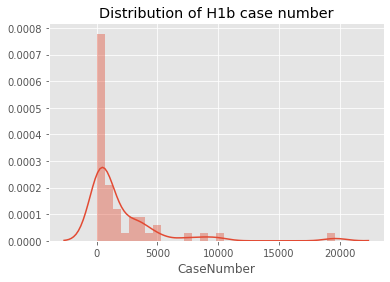

In [202]:
import seaborn as sns
plt.style.use('ggplot')
sns.distplot(result['CaseNumber'],kde=True,rug=False,bins=30)
plt.title('Distribution of H1b case number')

plt.savefig("figure1.png",dpi=100)

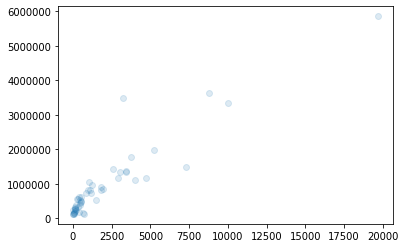

In [160]:
plt.scatter(result['CaseNumber'],result['firmNumber'],alpha = 0.15,marker='o')

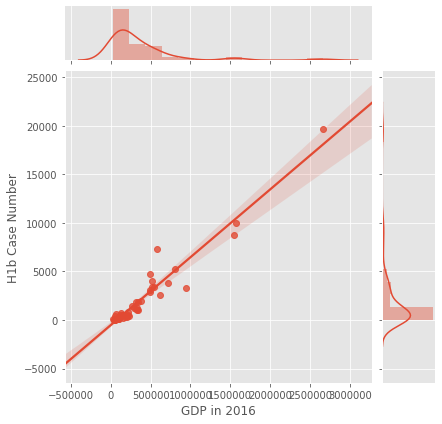

In [203]:
sns.jointplot(x='2016',y='CaseNumber',data=result,kind="reg")
# sns.jointplot("total_bill", "tip", data=tips, kind="reg")
plt.ylabel('H1b Case Number')
plt.xlabel('GDP in 2016')

plt.savefig('figure3.png',bbox_inches = 'tight')

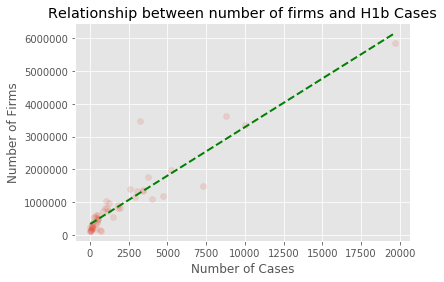

In [204]:

plt.scatter(result['CaseNumber'],result['firmNumber'],alpha = 0.15,marker='o')
plt.plot(np.unique(result['CaseNumber']),
         np.poly1d(np.polyfit(result['CaseNumber'],
                              result['firmNumber'], 1))(np.unique(result['CaseNumber'])),
         color='green', linestyle="--", linewidth=2)

plt.ylabel('Number of Firms')
plt.xlabel('Number of Cases')
plt.title('Relationship between number of firms and H1b Cases')
plt.savefig('figure2.png',dpi=100)

In [192]:
fig = plt.gcf
plt.show()
plt.savefig('figure3.png',dpi=100)

<Figure size 432x288 with 0 Axes>